In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
import requests
from lxml import html
import pandas as pd
from lxml import etree
import re
import numpy as np

def extractCells(row, isHeader=False):
    if isHeader:
        cells = row.findall('.//th')
    else:
        cells = row.findall('.//td')
        
    # The ...strip().splitlines()[0] is not strictly necessary, but it helps for beautifying the headers
    return [val.text_content() for val in cells]

def parse_primary_data(table):
    rows = table.findall(".//tr")
    header = extractCells(rows[1], isHeader=True)
    data = [extractCells(row, isHeader=False) for row in rows[2:]]
    return pd.DataFrame(data, columns=['Date','State or Territory','Total Delegates', 'Trump Won/Target', 'Cruz Won/Target','Kasich Won/Target','Rubio Won/Target'])

url = 'http://projects.fivethirtyeight.com/election-2016/delegate-targets/'
response = requests.get(url)
doc = html.fromstring(response.text)

results = doc.findall(".//*[@id='state-list']/table[1]")
x = results[0]



df = parse_primary_data(x)
df

,Date,State or Territory,Total Delegates,Trump Won/Target,Cruz Won/Target,Kasich Won/Target,Rubio Won/Target
0,Feb. 1,Iowa,30,7/10,8/13,1/11,7/12
1,Feb. 9,New Hampshire,23,11/8,3/8,4/11,2/10
2,Feb. 20,South Carolina,50,50/41,0/50,0/6,0/6
3,Feb. 23,Nevada,30,14/13,6/11,1/10,7/11
4,March 1,Alabama,50,36/19,13/26,0/7,1/13
5,,Alaska,28,11/9,12/12,0/9,5/12
6,,Arkansas,40,16/14,15/21,0/6,9/12
7,,Georgia,76,44/25,17/41,0/18,15/26
8,,Massachusetts,42,22/20,4/12,8/21,8/16
9,,Minnesota,38,8/12,13/13,0/14,17/14


In [2]:
df['Trump Won'], df['Trump Target'] = zip(*df['Trump Won/Target'].apply(lambda x: x.split('/', 1)))
df['Cruz Won'], df['Cruz Target'] = zip(*df['Cruz Won/Target'].apply(lambda x: x.split('/', 1)))
df['Kasich Won'], df['Kasich Target'] = zip(*df['Kasich Won/Target'].apply(lambda x: x.split('/', 1)))
df['Trump Won'] = pd.to_numeric(df['Trump Won'])
df['Cruz Won'] = pd.to_numeric(df['Cruz Won'])
df['Kasich Won'] = pd.to_numeric(df['Kasich Won'])
df['Trump Target'] = pd.to_numeric(df['Trump Target'])
df['Cruz Target'] = pd.to_numeric(df['Cruz Target'])
df['Kasich Target'] = pd.to_numeric(df['Kasich Target'])
df['Date'] = df['Date'].astype(str)

In [3]:
del df['Trump Won/Target']
del df['Cruz Won/Target']
del df['Kasich Won/Target']
del df['Rubio Won/Target']

In [8]:
df = df.applymap(lambda x: np.nan if isinstance(x, basestring) and x.isspace() else x)
df
# df.fillna(method='ffill')

,Date,State or Territory,Total Delegates,Trump Won,Trump Target,Cruz Won,Cruz Target,Kasich Won,Kasich Target,Trump perc,Cruz perc,Kasich perc
0,Feb. 1,Iowa,30,7,10,8,13,1,11,0.700000,0.615385,0.090909
1,Feb. 9,New Hampshire,23,11,8,3,8,4,11,1.000000,0.523810,0.227273
2,Feb. 20,South Carolina,50,50,41,0,50,0,6,1.152542,0.154930,0.178571
3,Feb. 23,Nevada,30,14,13,6,11,1,10,1.138889,0.207317,0.157895
4,March 1,Alabama,50,36,19,13,26,0,7,1.296703,0.277778,0.133333
5,,Alaska,28,11,9,12,12,0,9,1.290000,0.350000,0.111111
6,,Arkansas,40,16,14,15,21,0,6,1.271930,0.404255,0.100000
7,,Georgia,76,44,25,17,41,0,18,1.359712,0.406593,0.076923
8,,Massachusetts,42,22,20,4,12,8,21,1.327044,0.402062,0.141414
9,,Minnesota,38,8,12,13,13,0,14,1.280702,0.439614,0.123894


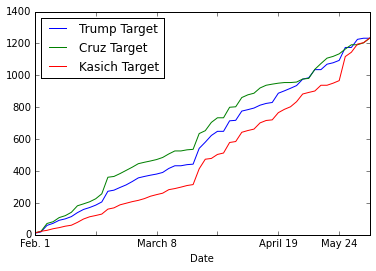

In [5]:
targetdf = df[['Trump Target', 'Cruz Target', 'Kasich Target', 'Date']].set_index('Date').cumsum()

targetdf = targetdf.astype(float)
targetdf = targetdf.ix[:-1] # Deletes the last "TOTAL" row
targetdf.plot()

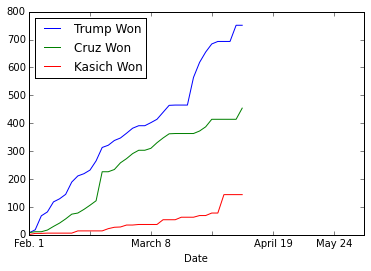

In [6]:
wondf = df[['Trump Won', 'Cruz Won', 'Kasich Won', 'Date']].set_index('Date')
wondf = wondf.ix[:-1]
wondf = wondf.astype(float)

wondf.cumsum().plot()

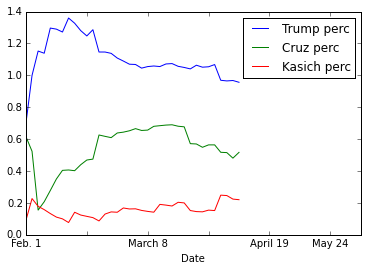

In [7]:
df['Trump perc'] = (df['Trump Won'].cumsum()/df['Trump Target'].cumsum())
df['Cruz perc'] = (df['Cruz Won'].cumsum()/df['Cruz Target'].cumsum())
df['Kasich perc'] = (df['Kasich Won'].cumsum()/df['Kasich Target'].cumsum())


percdf = df[['Trump perc', 'Cruz perc', 'Kasich perc', 'Date']].set_index('Date')
percdf = percdf.ix[:-1]
percdf = percdf.astype(float)

percdf.plot()